Лабораторная работа №4

Фомин Павел. ШАД-312

task1

In [2]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gaussian_noise = np.random.normal(0, 1, 500)

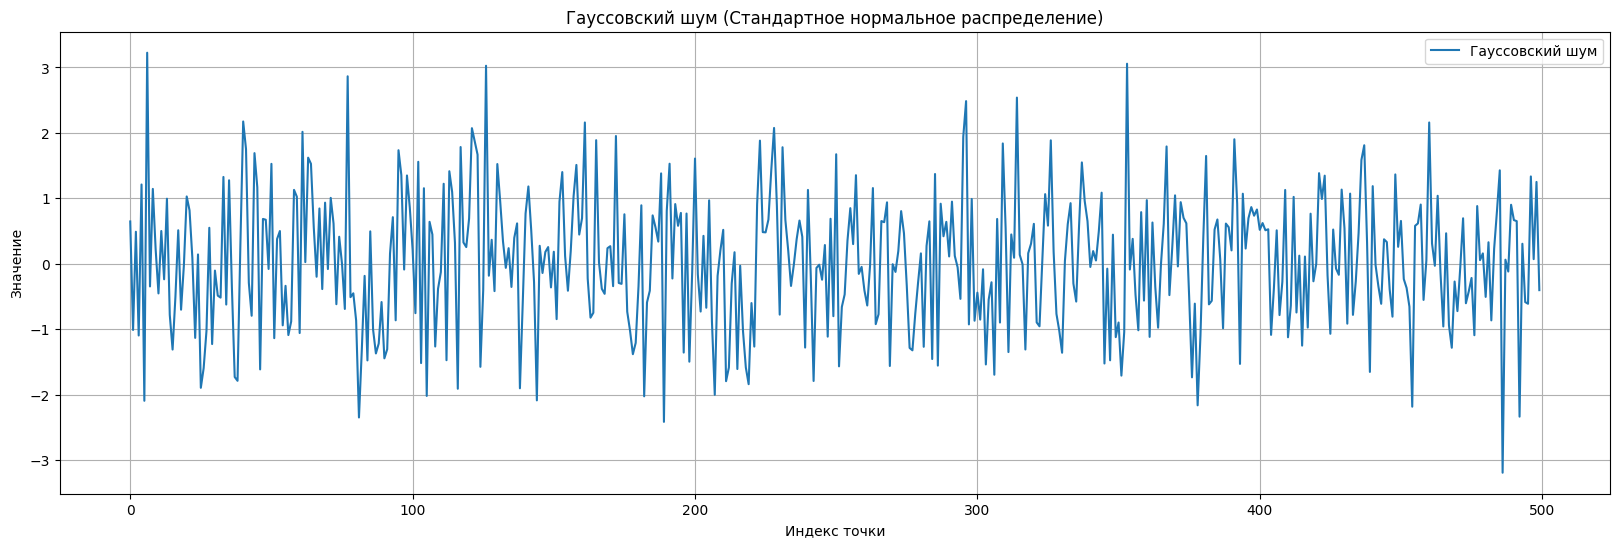

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(gaussian_noise, label='Гауссовский шум')
plt.title('Гауссовский шум (Стандартное нормальное распределение)')
plt.xlabel('Индекс точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
adfuller_test = adfuller(gaussian_noise)

In [6]:
adfuller_test

(-22.21695168938234,
 0.0,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1380.912043735222)

In [7]:
p_value = adfuller_test[1]
print(f'p-value = {p_value:.20f}')

p-value = 0.00000000000000000000


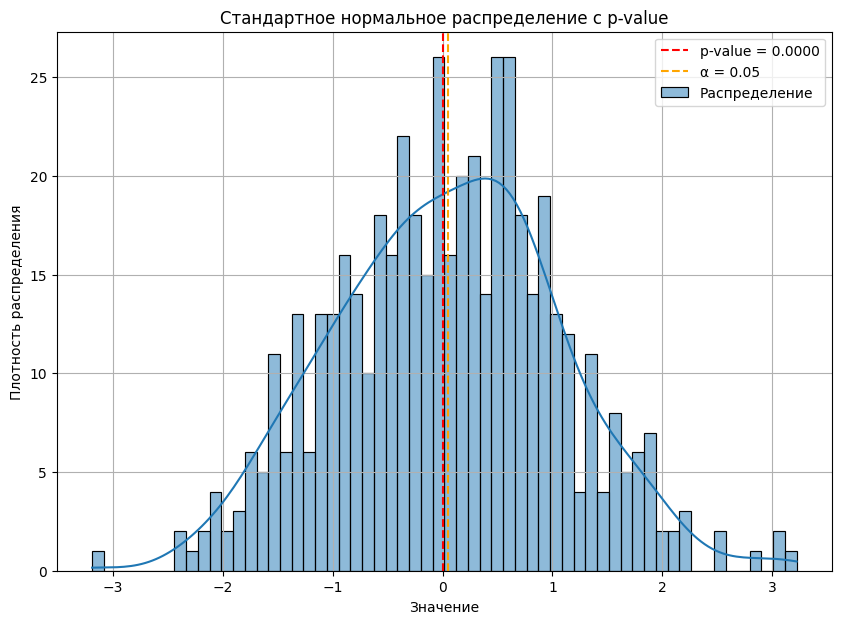

In [8]:
plt.figure(figsize=(10, 7))
sns.histplot(gaussian_noise, bins=60, kde=True, label='Распределение')

plt.axvline(x=p_value, color='r', linestyle='--', label=f'p-value = {p_value:.4f}')
plt.axvline(x=0.05, color='orange', linestyle='--', label=f'α = {0.05}')

plt.title('Стандартное нормальное распределение с p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.legend()
plt.grid(True)
plt.show()

task2

In [9]:
trend = 0.1 * np.arange(500)
gaussian_noise_with_trend = gaussian_noise + trend

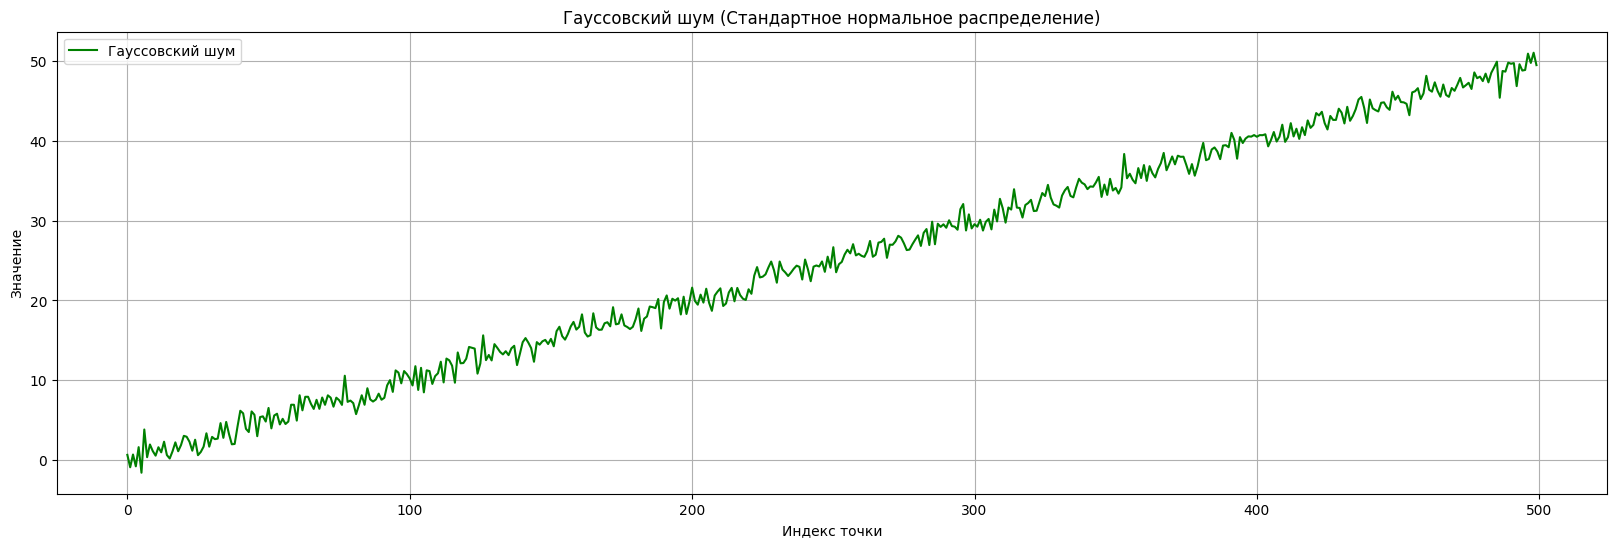

In [10]:
plt.figure(figsize=(20, 6))
plt.plot(gaussian_noise_with_trend, label='Гауссовский шум', color='green')
plt.title('Гауссовский шум (Стандартное нормальное распределение)')
plt.xlabel('Индекс точки')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
adfuller_test_2 = adfuller(gaussian_noise_with_trend)
adfuller_test_2

(-0.15187474066520834,
 0.9440201624196346,
 18,
 481,
 {'1%': -3.4440184853599876,
  '5%': -2.867567599912013,
  '10%': -2.5699804779975883},
 1432.6691054620105)

In [12]:
p_value2 = adfuller_test_2[1]
print(f'p-value with trend = {p_value2:.20f}')

p-value with trend = 0.94402016241963460086


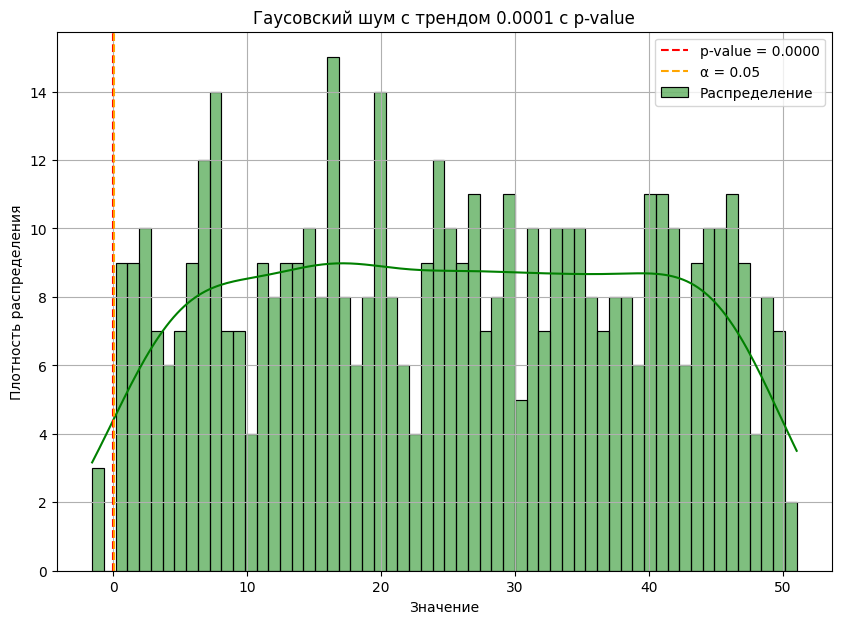

In [13]:
plt.figure(figsize=(10, 7))
sns.histplot(gaussian_noise_with_trend, bins=60, kde=True, label='Распределение', color='g')

plt.axvline(x=p_value, color='r', linestyle='--', label=f'p-value = {p_value:.4f}')
plt.axvline(x=0.05, color='orange', linestyle='--', label=f'α = {0.05}')

plt.title('Гаусовский шум с трендом 0.0001 с p-value')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.legend()
plt.grid(True)
plt.show()

task3

In [14]:
data = pd.read_csv('passengers.csv')
data.rename(columns={'#Passengers': 'passengers_count'}, inplace=True)
data['Month'] = pd.to_datetime(data['Month']) 
data

,Month,passengers_count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [15]:
df = data.copy()
df.head()

,Month,passengers_count
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
df_part1 = df.iloc[:49]
df_part2 = df.iloc[49:97]
df_part3 = df.iloc[97:]
df_by_parts = (df_part1, df_part2, df_part3)

In [17]:
print('Статистики по частям датасета\n')
for part_index, part in enumerate(df_by_parts):
    part_mean = part['passengers_count'].mean()
    part_var = part['passengers_count'].var()
    print(f'ЧАСТЬ {part_index + 1}: Среднее = {part_mean:.3f}, Дисперсия = {part_var:.3f}')

Статистики по частям датасета

ЧАСТЬ 1: Среднее = 159.143, Дисперсия = 1100.750
ЧАСТЬ 2: Среднее = 271.521, Дисперсия = 3031.148
ЧАСТЬ 3: Среднее = 415.574, Дисперсия = 6080.641


In [18]:
adfuller_test_df = adfuller(df['passengers_count'])
adfuller_test_df

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
p_value_df = adfuller_test_df[1]
print(f'p-value для обычного датасета = {p_value_df:.20f}')

p-value для обычного датасета = 0.99188024343764102930


In [20]:
print('DF-тест по частям датасета\n')
for part_index, part in enumerate(df_by_parts):
    adt = adfuller(part['passengers_count'])
    p_value = adt[1]
    print(f'ЧАСТЬ {part_index + 1}: p_value = {p_value:.3f}')

DF-тест по частям датасета

ЧАСТЬ 1: p_value = 0.999
ЧАСТЬ 2: p_value = 0.998
ЧАСТЬ 3: p_value = 0.997


In [21]:
log_df = data.copy()
log_df['passengers_count'] = np.log(log_df['passengers_count'])
log_df.head()

,Month,passengers_count
0,1949-01-01,4.718499
1,1949-02-01,4.770685
2,1949-03-01,4.882802
3,1949-04-01,4.859812
4,1949-05-01,4.795791


In [22]:
log_df_part1 = log_df.iloc[:49]
log_df_part2 = log_df.iloc[49:97]
log_df_part3 = log_df.iloc[97:]
log_df_by_parts = (log_df_part1, log_df_part2, log_df_part3)

In [23]:
print('Статистики по логарифмированным частям датасета\n')
for part_index, part in enumerate(log_df_by_parts):
    part_mean = part['passengers_count'].mean()
    part_var = part['passengers_count'].var()
    print(f'ЧАСТЬ {part_index + 1}: Среднее = {part_mean:.3f}, Дисперсия = {part_var:.3f}')

Статистики по логарифмированным частям датасета

ЧАСТЬ 1: Среднее = 5.049, Дисперсия = 0.043
ЧАСТЬ 2: Среднее = 5.585, Дисперсия = 0.039
ЧАСТЬ 3: Среднее = 6.013, Дисперсия = 0.033


In [24]:
adfuller_test_log_df = adfuller(log_df['passengers_count'])
adfuller_test_log_df

(-1.7170170891069607,
 0.42236677477039125,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [25]:
p_value_log_df = adfuller_test_log_df[1]
print(f'p-value для логарифмированного датасета = {p_value_log_df:.20f}')

p-value для логарифмированного датасета = 0.42236677477039125117


In [26]:
print('DF-тест по частям логарифмированного датасета\n')
for part_index, part in enumerate(log_df_by_parts):
    adt = adfuller(part['passengers_count'])
    p_value = adt[1]
    print(f'ЧАСТЬ {part_index + 1}: p_value = {p_value:.3f}')

DF-тест по частям логарифмированного датасета

ЧАСТЬ 1: p_value = 0.994
ЧАСТЬ 2: p_value = 0.995
ЧАСТЬ 3: p_value = 0.995


DF-тест показывает, что ряд стационарный, статистики по каждой части говорят о том же. 